In [1]:
import wntr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wn=wntr.network.WaterNetworkModel('Net1.inp')

<Figure size 1000x800 with 0 Axes>

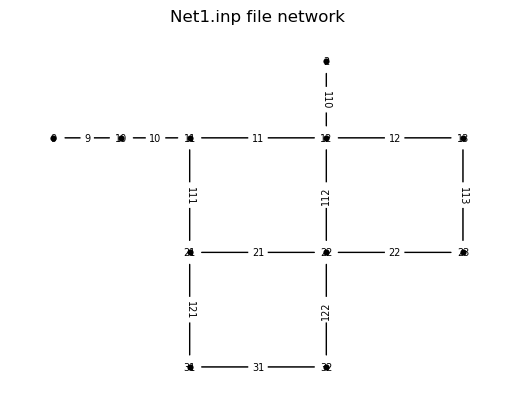

In [3]:
plt.figure(figsize=(10,8))
wntr.graphics.plot_network(wn,title='Net1.inp file network',node_labels=True,link_labels=True)
plt.show()

In [4]:
# adding demands

pattern=wntr.network.elements.Pattern('demand_pattern',[1,1.2,1.1,1.3,1.4,1.2,1,0.8,0.7,0.6,0.5,0.7,0.8,1.1,1,1.3,1.4,1.2,1.1,1,0,9,0.8,0.7])
wn.add_pattern('demand_pattern',pattern)


In [5]:
for junction in wn.junctions():
    junc=wn.get_node(junction[0])
    j=wn.get_node(junc)
    j.demand_timeseries_list[0].pattern_name='demand_pattern'
    

In [6]:
leak_node=wn.get_node('13')
leak_node.add_leak(wn,area=0.001,discharge_coeff=0.75,start_time=0)

In [7]:
wn.options.time.duration=24*3600
wn.options.time.hydraulic_timestep=3600
wn.options.time.report_timestep=3600
sim=wntr.sim.WNTRSimulator(wn)
results=sim.run_sim()

In [8]:
pressure1=results.node['pressure']
demands1=results.node['demand']

In [9]:
print(pressure1.head(10))
print("********************************")
print(demands1.head())

              10         11         12         13         21         22  \
0      89.585461  83.740503  82.299668  80.622655  82.253198  82.871128   
3600   89.870516  84.064680  82.661389  80.972594  82.598481  83.225473   
7200   89.856768  84.049044  83.010534  80.859851  82.160304  82.989049   
10800  89.923636  84.125093  83.095187  80.941547  82.241147  83.071687   
14400  90.134408  84.364808  83.178713  81.255135  82.714971  83.454670   
18000  90.299580  84.552671  83.388094  81.457437  82.914861  83.659379   
21600  90.170195  84.405511  83.590603  81.171130  82.305210  83.231198   
25200  90.122882  84.351699  83.530786  81.113468  82.248060  83.172892   
28800  89.931289  84.133796  83.471604  80.792794  81.768536  82.770808   
32400  89.784159  83.966468  83.285872  80.613939  81.590991  82.589988   

              23         31         32          2    9  
0      83.659723  80.951265  77.333490  36.576000  0.0  
3600   84.013196  81.298648  77.683929  36.937898  0.0  
720

In [10]:
pressure1.describe()

,10,11,12,13,21,22,23,31,32,2,9
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,89.571434,84.821207,84.327489,82.573401,83.945272,84.731125,85.559517,82.705952,79.125706,38.611610,0.0
std,3.613208,2.075051,1.658285,2.044423,2.244228,2.105324,2.224181,2.677636,2.729063,1.660497,0.0
min,79.914999,79.914999,82.299668,80.613939,81.590991,82.589988,83.218457,79.428159,75.679655,36.576000,0.0
25%,89.856768,84.064680,83.188376,80.972594,82.251711,83.162657,83.837521,80.558908,76.896923,37.468152,0.0
50%,90.122882,84.364808,83.530786,81.562649,82.914861,83.659379,84.403249,81.430950,77.884526,37.810911,0.0
75%,91.158242,85.529407,85.082949,83.884366,85.179705,86.273548,87.192756,84.610670,81.405472,39.351264,0.0
max,94.681769,89.539578,87.943441,86.968564,89.184587,89.384746,90.397842,88.543926,84.809715,42.205278,0.0


In [11]:
demands1.describe()

,10,11,12,13,21,22,23,31,32,2,9
count,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.0,0.009009,0.009009,0.006006,0.009009,0.012012,0.009009,0.006006,0.006006,0.001044,-0.097297
std,0.0,0.002678,0.002678,0.001786,0.002678,0.003571,0.002678,0.001786,0.001786,0.038205,0.043393
min,0.0,0.004732,0.004732,0.003155,0.004732,0.006309,0.004732,0.003155,0.003155,-0.085546,-0.117934
25%,0.0,0.006624,0.006624,0.004416,0.006624,0.008833,0.006624,0.004416,0.004416,-0.003092,-0.117415
50%,0.0,0.009464,0.009464,0.006309,0.009464,0.012618,0.009464,0.006309,0.006309,0.010540,-0.116784
75%,0.0,0.011356,0.011356,0.007571,0.011356,0.015142,0.011356,0.007571,0.007571,0.029051,-0.112137
max,0.0,0.013249,0.013249,0.008833,0.013249,0.017665,0.013249,0.008833,0.008833,0.044372,0.000000


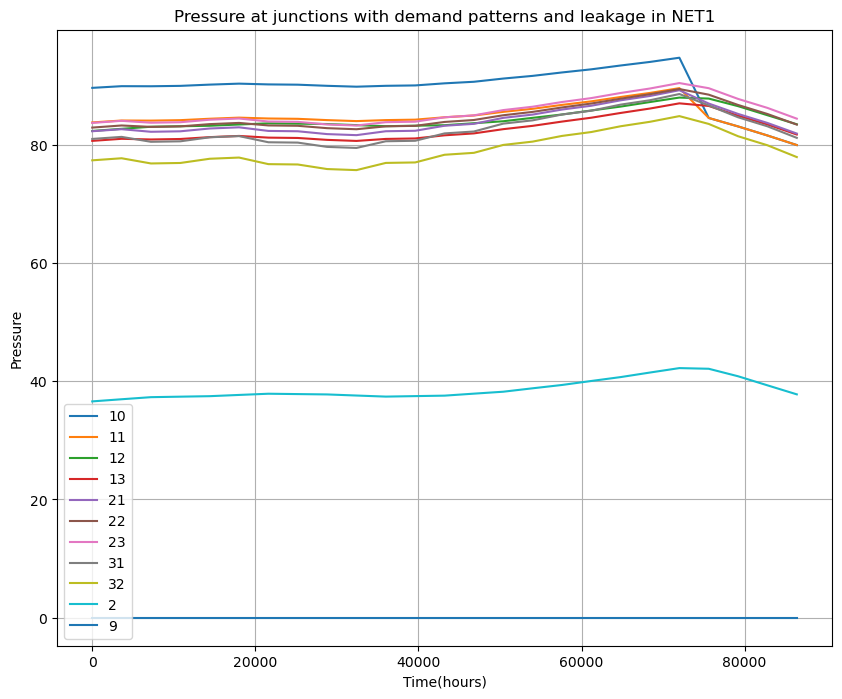

In [17]:
plt.figure(figsize=(10,8))
lst_of_junc=['10',	'11',	'12',	'13',	'21',	'22',	'23',	'31',	'32',	'2'	,'9']
for junction in lst_of_junc:
    pressure1.loc[:,junction].plot(label=junction)
plt.xlabel('Time(hours)')
plt.ylabel('Pressure')
plt.title('Pressure at junctions with demand patterns and leakage in NET1')
plt.legend()
plt.grid(True)
plt.show()

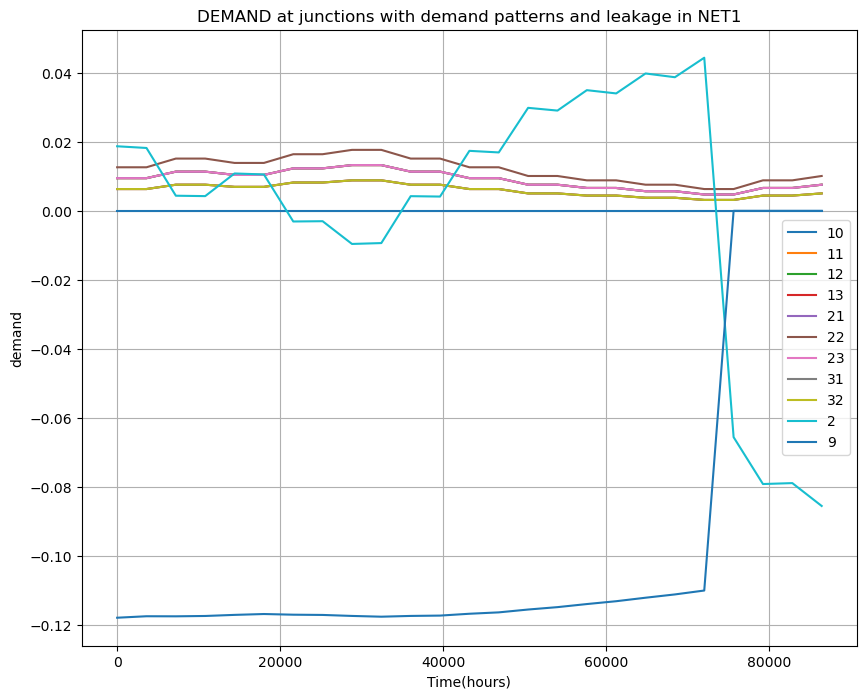

In [19]:
plt.figure(figsize=(10,8))
lst_of_junc=['10',	'11',	'12',	'13',	'21',	'22',	'23',	'31',	'32',	'2'	,'9']
for junction in lst_of_junc:
    demands1.loc[:,junction].plot(label=junction)
plt.xlabel('Time(hours)')
plt.ylabel('demand')
plt.title('DEMAND at junctions with demand patterns and leakage in NET1')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
leak_node=wn.get_node('12')
leak_node.add_leak(wn,area=0.005,discharge_coeff=0.75,start_time=0)

In [7]:
wn.options.time.duration=24*3600
wn.options.time.hydraulic_timestep=3600
wn.options.time.report_timestep=3600
sim=wntr.sim.WNTRSimulator(wn)
results=sim.run_sim()

In [8]:
pressure2=results.node['pressure']
demands2=results.node['demand']

In [9]:
pressure2.describe()

,10,11,12,13,21,22,23,31,32,2,9
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,58.655898,48.680567,43.092491,44.349018,45.021986,44.518668,45.864912,43.460701,39.302304,30.983011,0.0
std,14.466886,16.386582,18.069560,18.074027,17.643870,18.021392,18.056074,17.896246,18.038911,1.482870,0.0
min,41.458249,29.225754,22.369834,23.265160,23.671642,23.443579,24.700535,21.229334,17.097650,30.479668,0.0
25%,48.612161,37.307875,30.711425,31.934838,32.725923,32.149454,33.454607,30.930313,26.822281,30.479668,0.0
50%,56.228805,45.919529,39.730225,41.132228,42.207730,41.287274,42.663099,40.881574,36.627408,30.479668,0.0
75%,61.503765,51.888076,46.006304,47.506698,48.787960,47.713001,49.105277,47.680451,43.186569,30.479668,0.0
max,89.633129,83.794711,82.210931,83.370491,82.664956,83.433752,84.825544,81.397835,77.830046,36.576000,0.0


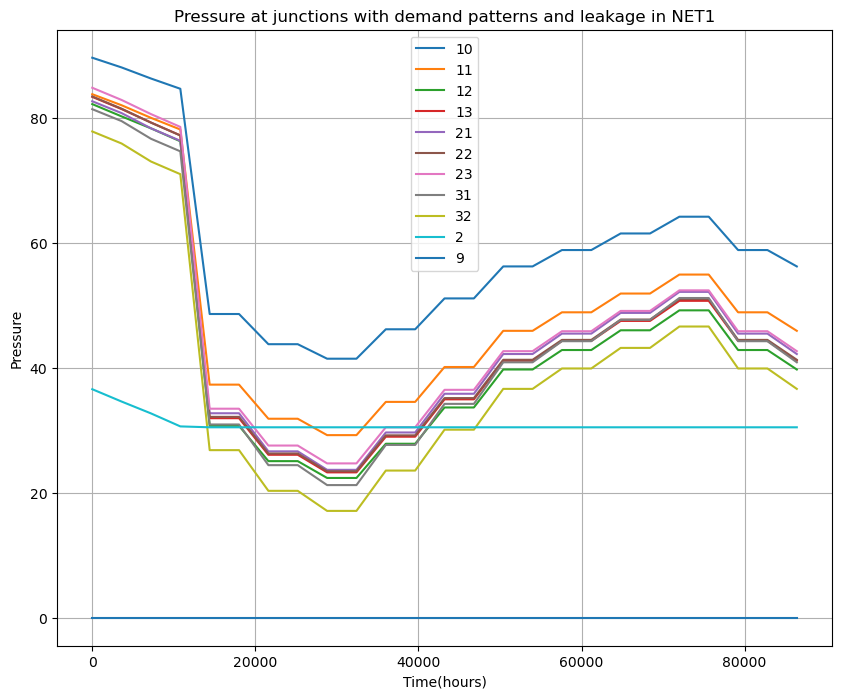

In [10]:
plt.figure(figsize=(10,8))
lst_of_junc=['10',	'11',	'12',	'13',	'21',	'22',	'23',	'31',	'32',	'2'	,'9']
for junction in lst_of_junc:
    pressure2.loc[:,junction].plot(label=junction)
plt.xlabel('Time(hours)')
plt.ylabel('Pressure')
plt.title('Pressure at junctions with demand patterns and leakage in NET1')
plt.legend()
plt.grid(True)
plt.show()

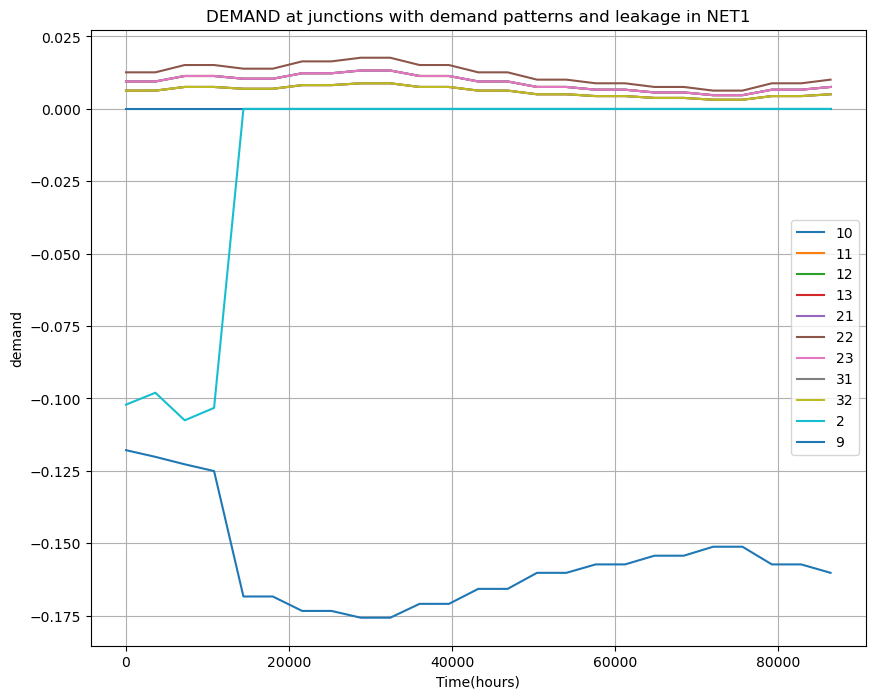

In [11]:
plt.figure(figsize=(10,8))
lst_of_junc=['10',	'11',	'12',	'13',	'21',	'22',	'23',	'31',	'32',	'2'	,'9']
for junction in lst_of_junc:
    demands2.loc[:,junction].plot(label=junction)
plt.xlabel('Time(hours)')
plt.ylabel('demand')
plt.title('DEMAND at junctions with demand patterns and leakage in NET1')
plt.legend()
plt.grid(True)
plt.show()